# Final Project Submission

Student name: Teofilo Acholla Ligawa Gafna

Student pace: self paced / part time / full time: full time Data Science

Instructor name: Lucille Kaleha

## Overview
The study is tasked with predicting the prices of houses in King County.

## Business Question
The role assumed is that of a data scientist tasked with coming up with a linear model to predict the house prices in King County to help the following stakeholders:
* homeowners
* real estate agencies
* land owners

The analysis is based upon the following questions:
1. What features have a big impact in the price of a house?
2. How can we improve the value of a house?

### Data Understanding

The study made use of housing data provided by King County. The columns in the data set are as listed below:

* id - Unique identified for a house
* date - Date house was sold
* price - Price is prediction target
* bedrooms - Number of Bedrooms/House
* bathrooms - Number of bathrooms/bedrooms
* sqft_living - Square footage of the home
* sqft_lot - Square footage of the lot
* floors - Total floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - Zipcode
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - Square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors


## Methodology

The study used the following methodology:
 * Data cleaning
 * Data Preparation to ease exploratory analysis
 * Data Understanding to get insight from data

### Data Cleaning and Preparation

In [516]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

#loading the data
df = pd.read_csv('data/kc_house_data.csv')

#Previewing the data frame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [517]:
#descriptive statistics of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [518]:
#viewing information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [519]:
#checking the data types of the columnns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [520]:
#the number of rows and columns in the data
print(f"This data has {df.shape[0]} columns and {df.shape[1]} rows")

This data has 21597 columns and 21 rows


In [521]:
#checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Three columns have missing values, and they include:
- **yr_renovated**
- **waterfront**
- **view**

In [522]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [523]:
#checking for the percentage of missing values of data points in each column
(df.isna().sum() / len(df)) * 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

11, 0.29 and 18 % of the rows in the columns **waterfront**, **view** and **yr_renovated** have missing values

##### Dealling with missing values

In [524]:
#checking the data types of the columns to know how to deal with them
print(df.view.dtype, df.waterfront.dtype, df.yr_renovated.dtype)

object object float64


**view** (categorical variable) and **waterfront** (categorical variable) are objects, pandas for string and **yr_renovated** (discrete numeric variable) is a of type float. The study does not recommend removing the missing values of the string columns.


In [525]:
#checking the unique values in view
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [526]:
#checking the values in waterfront
print(df.waterfront.value_counts(), df.waterfront.unique())

NO     19075
YES      146
Name: waterfront, dtype: int64 [nan 'NO' 'YES']


**waterfront** is a binary variable (0,1)

In [527]:
#Looking at the values in yr_renovated:
print(df.yr_renovated.unique(), df.yr_renovated.value_counts())
year_renovated = list(df.yr_renovated.unique())

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.] 0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [528]:
view_probs= list(df.view.value_counts(normalize=True))
view_probs

[0.9019225410977988,
 0.04444134856505991,
 0.02359060091018854,
 0.015324602953468934,
 0.014720906473483793]

In [529]:
# To see the most common values for each column
#Iterate through each column and print out the most common values based on percentage
for element in ['waterfront', 'view', 'yr_renovated']:
    print(element, '  percentages')
    print(df[element].value_counts(normalize=True).sort_values(ascending=False).head()*100)
    print('------------------')

waterfront   percentages
NO     99.240414
YES     0.759586
Name: waterfront, dtype: float64
------------------
view   percentages
NONE         90.192254
AVERAGE       4.444135
GOOD          2.359060
FAIR          1.532460
EXCELLENT     1.472091
Name: view, dtype: float64
------------------
yr_renovated   percentages
0.0       95.809631
2014.0     0.411152
2013.0     0.174599
2003.0     0.174599
2007.0     0.168966
Name: yr_renovated, dtype: float64
------------------


Notice the distribution of the various categories of the categorical variables (**waterfront** and **view**) based on percentage. We can easily fill missing values of these columns since the percentage of missing values are very little as compared to valid values.

In the column **yr_renovated**, only 17.78% of the values are missing values but upon further inspection, there comes realization that 95.8% of the values are 0.0 and there is no such thing as year 0.0. This makes close to 4,000 rows of the data.

#### Filling Missing Values

Missing values in this study will be filled on the basis of random choice guided by the probability density of the categorical variables and even the discrete numeric variable

In [530]:
#creating variables for use in imputing missing values
waterfront = ['NO','YES']
view = ['AVERAGE', 'FAIR', 'GOOD', 'EXCELLENT', 'NONE']

In [531]:
#getting the probablilities of the unique values
water_dens = [df[value].value_counts(normalize=True).sort_values(ascending=False).head()\
    for value in ['waterfront']]
view_dens =  [df[value].value_counts(normalize=True).sort_values(ascending=False)\
    for value in ['view']]
yr_ren_dens =  [df[value].value_counts(normalize=True).sort_values(ascending=False)\
    for value in ['yr_renovated']]
print(water_dens, view_dens, yr_ren_dens)

[NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64] [NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64] [0.0       0.958096
2014.0    0.004112
2013.0    0.001746
2003.0    0.001746
2007.0    0.001690
            ...   
1954.0    0.000056
1934.0    0.000056
1950.0    0.000056
1971.0    0.000056
1948.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64]


##### Feature Engineering the **yr_renovated** variable

Text(0.5, 0.98, 'Histogram of year renovated')

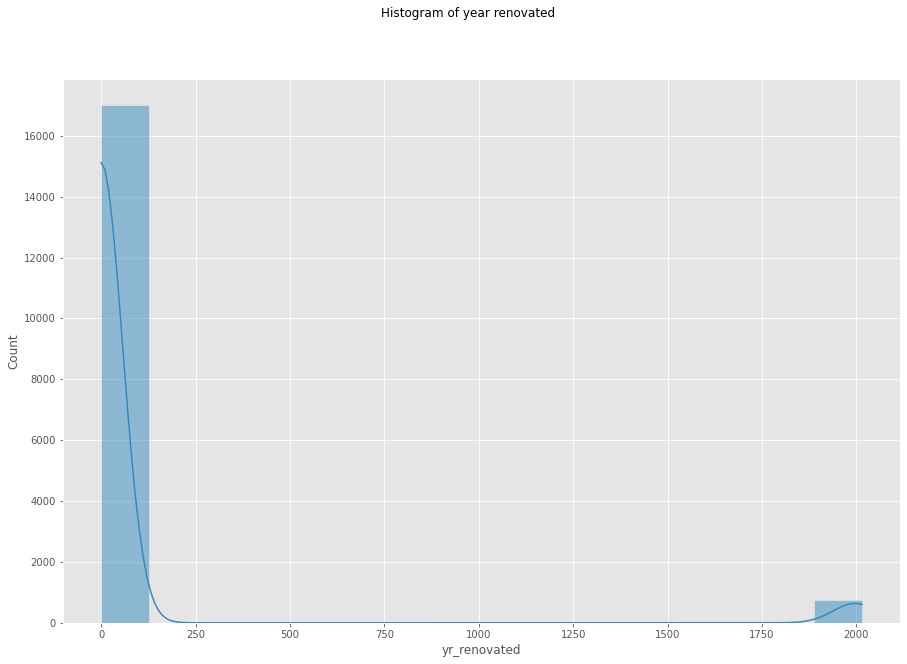

In [532]:
plt.subplots(figsize=(15,10))
sns.histplot(df.yr_renovated, kde=True)
plt.suptitle('Histogram of year renovated')

From the infographic above, we realize that most of the variables are at the year 0.0 mark yet that is not possible. It would only make sense to think of year 0.0 as houses that were not renovated and the data points with 'sensible' years are houses that were renovated in those respective years. Thus creation of a binary column based on **yr_renovated** would make a lot of sense if the column were to be used later on.

In [533]:
# creating a new binary column called renovated
## where 0 implies the house was not renovated and 1 implies that the house was renovated

#if the year is 'sensible' then the value is 1
df.loc[df['yr_renovated'] > 0.0, 'renovated'] = 1

#if the year is 'not sensible' then the value is 0
df.loc[df['yr_renovated'] == 0.0, 'renovated'] = 0

In [534]:
#obtaining specific probability weights
density_water = list(df.waterfront.value_counts(normalize=True))
density_view = list(df.view.value_counts(normalize=True))
density_yr_ren = list(df.yr_renovated.value_counts(normalize=True))
#summing all the densities except the highest(density of 0.0) to get the probability of renovating and not renovating
density_yr_ren_1 = sum(density_yr_ren[1:])

#creating a variable to house the two new densities
density_ren = [density_yr_ren[0], density_yr_ren_1]
density_ren

[0.9580963108983385, 0.04190368910166154]

In [535]:
#Defining a function to fill missing values for waterfront
#setting seed for reproducibility
np.random.seed(0)
def impute_missing_water(value):
    '''A function that fills missing values for waterfront'''
    if value not in waterfront:
        return np.random.choice(waterfront, p=density_water)
    else:
        return value

#applying the function to the waterfront column
df['waterfront'] = df['waterfront'].map(lambda x: impute_missing_water(x))


#Defining a function to impute missing values of view
def impute_missing_view(value):
    '''A function that fills missing values for view'''
    if value not in view:
        return np.random.choice(view, p = density_view)
    else:
        return value
    
#applying the function to the view column
df['view'] = df['view'].map(lambda x: impute_missing_view(x))
for col in ['waterfront','view', 'yr_renovated', 'renovated']:
    print('For', col)
    print('The probabilities are:', df[col].value_counts(normalize=True).\
        sort_values(ascending=False).head())
    print("Number of missing values are : {}".format(df[col].isna().sum()))
    print("-----------------------------")

For waterfront
The probabilities are: NO     0.992499
YES    0.007501
Name: waterfront, dtype: float64
Number of missing values are : 0
-----------------------------
For view
The probabilities are: NONE         0.899292
AVERAGE      0.046905
GOOD         0.023707
FAIR         0.015419
EXCELLENT    0.014678
Name: view, dtype: float64
Number of missing values are : 0
-----------------------------
For yr_renovated
The probabilities are: 0.0       0.958096
2014.0    0.004112
2013.0    0.001746
2003.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64
Number of missing values are : 3842
-----------------------------
For renovated
The probabilities are: 0.0    0.958096
1.0    0.041904
Name: renovated, dtype: float64
Number of missing values are : 3842
-----------------------------


##### Feature Engineering sqft_basement

In [536]:
#checking for houses without basement
print(df.sqft_basement.value_counts())
print(df.sqft_basement.isna().sum())

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64
0


Houses with 0 are those that do not have a basement

In [537]:
#Creating a variable called basement that is binary, 0 = has no basement and 1 = has basement
#If the value is 'sensible' equate to zero
df.loc[df['sqft_basement'] != '0.0', 'basement'] = 1

#if the value is 'not sensible' then equate to zero
df.loc[df['sqft_basement'] == '0.0', 'basement'] = 0

#checking to see if the feature was correctly created
df.basement.value_counts()

0.0    12826
1.0     8771
Name: basement, dtype: int64

In [538]:
df.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [539]:
#changing the data type of waterfront, view and condition
#for waterfront, NO = 0 and YES = 1
#for view, 'AVERAGE' = 1, 'FAIR' = 2, 'GOOD' = 3, 'EXCELLENT' = 4, 'NONE' = 0
waterfront_dict = {'NO':0, 'YES':1}
view_dict = {'AVERAGE': 1, 'FAIR': 2, 'GOOD': 3, 'EXCELLENT': 4, 'NONE': 0}
cond_dict = {'Poor':0, 'Fair':1, 'Good':2, 'Very Good':3, 'Average':4}
df['waterfront'].replace({'NO':0, 'YES':1}, inplace = True)
df['view'].replace({'AVERAGE': 1, 'FAIR': 2, 'GOOD': 3, 'EXCELLENT': 4, 'NONE': 0}, inplace = True)
df['condition'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very Good':3, 'Average':4}, inplace=True)

In [540]:
#previewing the changed columns
for element in ['waterfront', 'view', 'condition']:
    print(element, '  percentages')
    print(df[element].value_counts(normalize=True).sort_values(ascending=False).head()*100)
    print('------------------')

waterfront   percentages
0    99.249896
1     0.750104
Name: waterfront, dtype: float64
------------------
view   percentages
0    89.929157
1     4.690466
3     2.370700
2     1.541881
4     1.467796
Name: view, dtype: float64
------------------
condition   percentages
4    64.916424
2    26.286058
3     7.876094
1     0.787146
0     0.134278
Name: condition, dtype: float64
------------------


In [541]:
#converting the data type of the date column to pd.datetime and creating multiple columns out of it
# convert date column from string to datetime
df['date'] = pd.to_datetime(df['date'])

#create a column, sale_year
df['sales_year'] = df['date'].dt.year

#create a column for month of sale
df['sales_month'] = df['date'].dt.month

#create a column to show day of sale
df['sales_day'] = df['date'].dt.dayofweek

#create a column to show age of houseat time of sale
df['house_age'] = df['sales_year'] - df['yr_built']

seasons = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}
df['sales_season'] = df['sales_month'].map(seasons)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,renovated,basement,sales_year,sales_month,sales_day,house_age,sales_season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,-122.257,1340,5650,0.0,0.0,2014,10,0,59,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,-122.319,1690,7639,1.0,1.0,2014,12,1,63,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,-122.233,2720,8062,NaN,0.0,2015,2,2,82,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,-122.393,1360,5000,0.0,1.0,2014,12,1,49,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,-122.045,1800,7503,0.0,0.0,2015,2,2,28,Winter


In [542]:
##sorting missing values for renovated column
np.random.seed(0)
renovate = [1.0, 0.0]
def impute_missing_ren(value):
    if value not in renovate:
        return np.random.choice(renovate, p = density_ren)
    else:
        return value
df['renovated'] = df['renovated'].map(lambda x: impute_missing_ren(x))
df.renovated.value_counts(normalize=True)
        

0.0    0.796592
1.0    0.203408
Name: renovated, dtype: float64

In [543]:
for col in ['waterfront','view', 'yr_renovated', 'renovated']:
    print('For', col)
    print('The probabilities are:', df[col].value_counts(normalize=True).\
        sort_values(ascending=False).head())
    print("Number of missing values are : {}".format(df[col].isna().sum()))
    print("-----------------------------")

For waterfront
The probabilities are: 0    0.992499
1    0.007501
Name: waterfront, dtype: float64
Number of missing values are : 0
-----------------------------
For view
The probabilities are: 0    0.899292
1    0.046905
3    0.023707
2    0.015419
4    0.014678
Name: view, dtype: float64
Number of missing values are : 0
-----------------------------
For yr_renovated
The probabilities are: 0.0       0.958096
2014.0    0.004112
2013.0    0.001746
2003.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64
Number of missing values are : 3842
-----------------------------
For renovated
The probabilities are: 0.0    0.796592
1.0    0.203408
Name: renovated, dtype: float64
Number of missing values are : 0
-----------------------------


In [544]:
# checking for duplicates using the id column since it is a unique identifier
total_duplicates = df.id.duplicated().sum()

# creating a data frame of duplicates to check whether the duplicated ids have duplicated dates implying duplicated transactions
# metric of success = data points are considered duplicates if the transaction is duplicated

# Having in mind that a house can be sold more than once thus we do not do away with duplicated ids but only where both the id
# and the date duplicated.
id_duplicated = df.loc[df['id'].duplicated(), ['id','date']]
print(total_duplicates) # the number of duplicated ids
print(id_duplicated.duplicated().sum()) # number of duplicated transactions

177
0


There seems to be no duplicated transactions in the data

#### Question 1: What features have a big impact in the price of a house?

The study took the position that the feature with very high correlation coefficient with price has the biggest impact on the price of a house.

#### Correlation Matrix

In [545]:
#creating a correlation matrix to find which feature is most likely to have a linear relationship with price
matrix = df.corr()
matrix_max = matrix.drop('price')
print('The most correlated feature with price is:', matrix_max['price'].idxmax(), 'with a correlation coefficient of', matrix_max['price'].max())

The most correlated feature with price is: sqft_living with a correlation coefficient of 0.7019173021377559


In [616]:
#The following features are the top 10 most correlated with price:
main_predictors = list(matrix_max['price'].sort_values(ascending=False))
main_preds = list(matrix_max['price'].sort_values(ascending=False).index)
main_predictors = dict(zip(main_preds, main_predictors))

iteration = 0
top_10_predictors = []
for key, value in main_predictors.items():
    iteration +=1
    if iteration < 11:
        top_10_predictors.append(key)
        print(key, 'with a correlation coefficient of',value) 
    

sqft_living with a correlation coefficient of 0.7019173021377559
sqft_above with a correlation coefficient of 0.6053679437051771
sqft_living15 with a correlation coefficient of 0.5852412017040634
bathrooms with a correlation coefficient of 0.525905621453199
view with a correlation coefficient of 0.3940639944866663
bedrooms with a correlation coefficient of 0.3087874719565322
lat with a correlation coefficient of 0.30669231424763493
floors with a correlation coefficient of 0.25680353700802033
waterfront with a correlation coefficient of 0.2557056953900344
basement with a correlation coefficient of 0.17547209085231294


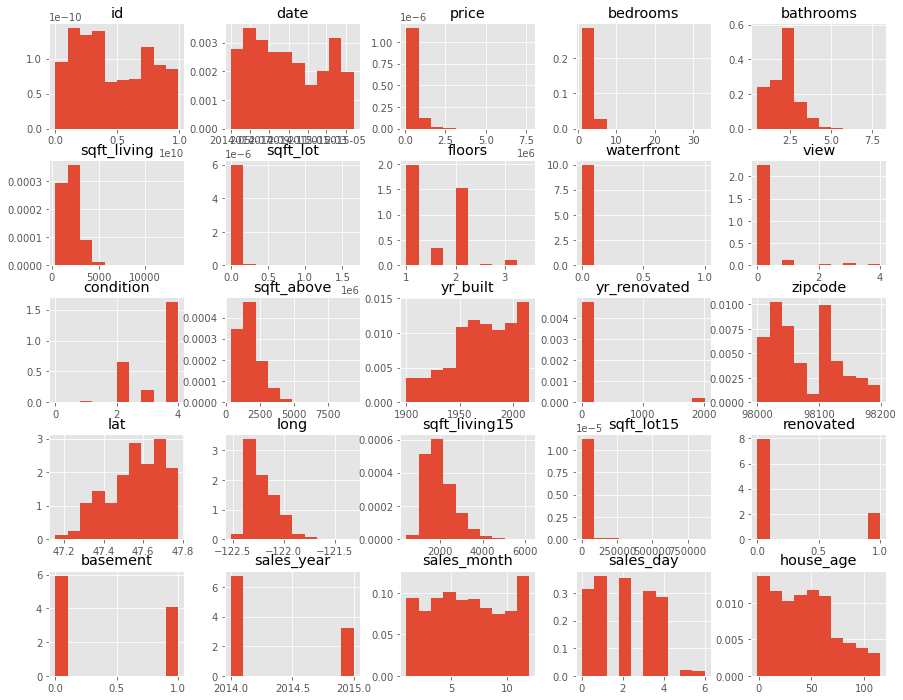

In [548]:
#an infographic of the variables
df.hist(figsize=(15,12), density = True)
plt.show()

### Data Understanding and Exploratory Analysis

Performing exploratory data analysis to get insight from the data

##### Question 2: How can we improve the value of a house?

##### Feature **sqft_living**

Text(0.5, 0.98, 'Sqft_living vs Price in millions')

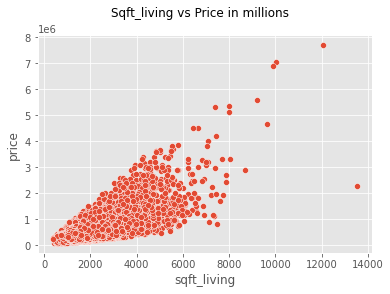

In [549]:
#plotting sqft_living vs price
sns.scatterplot(df.sqft_living, df.price)
plt.suptitle('Sqft_living vs Price in millions')

##### Observations
* There exists a strong and positive linear relationship between **sqft_living** and **price**

* An increase in **sqft_living** is followed by an increase in **price**

##### Feature **sqft_lot**

Text(0.5, 0.98, 'Price in millions vs sqft_lot')

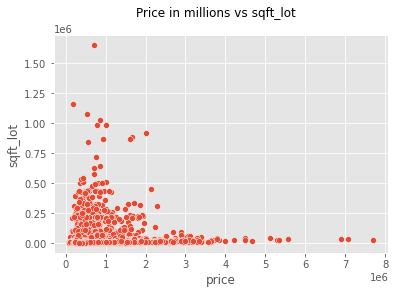

In [550]:
#plotting the feature vs price
sns.scatterplot(df.price, df.sqft_lot)
plt.suptitle("Price in millions vs sqft_lot")

In [551]:
# correlation with price
df.sqft_lot.corr(df.price)

0.08987622099083864

##### Observations

* **sqft_lot** and **price** have a weak positive correlation

* An increase in **sqft_lot** does not imply an increase in **price**

##### Feature **sqft_above**

Text(0.5, 0.98, 'Price in millions vs sqft_above')

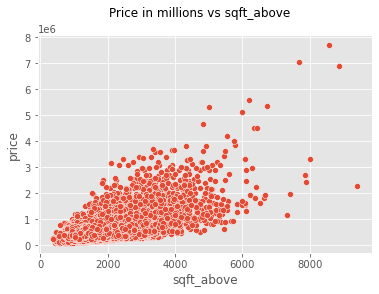

In [552]:
#plotting the feature vs price
sns.scatterplot(df.sqft_above, df.price)
plt.suptitle("Price in millions vs sqft_above")

In [617]:
df.sqft_above.corr(df.price)

0.6053679437051804

##### Observations
* There exists a  strong and positive correlation between **sqft_above** and **price**

* An increase in **sqft_above** implies an increase in **price**

##### Feature **bedrooms**

Text(0.5, 0.98, 'Price in Millions vs Bedrooms boxplot')

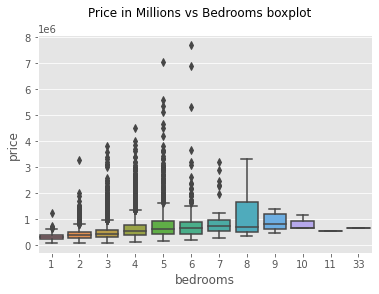

In [553]:
#plotting feature vs price
sns.boxplot(df.bedrooms, df.price)
plt.suptitle('Price in Millions vs Bedrooms boxplot')

<Figure size 1080x1080 with 0 Axes>

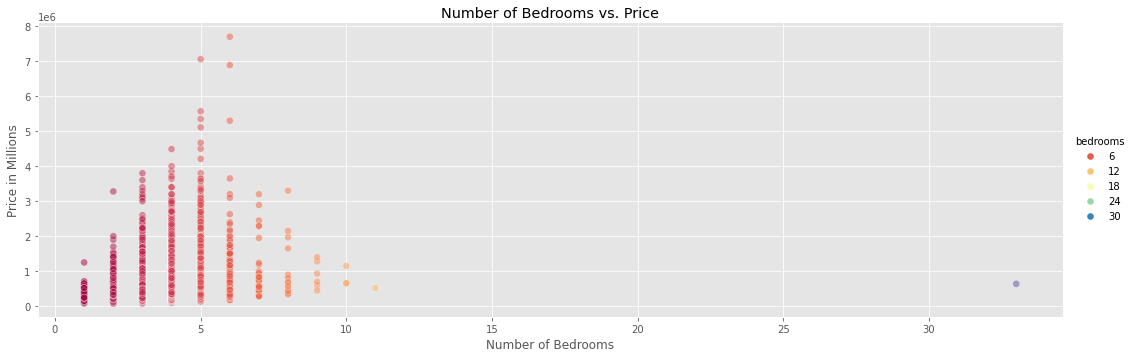

In [554]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = df,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.show()

In [555]:
#check out the outlier at 9+ number of bedrooms
df[df['bedrooms'] > 9]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,renovated,basement,sales_year,sales_month,sales_day,house_age,sales_season
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,-122.363,1420,4960,1.0,1.0,2014,8,3,96,Summer
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0,1,...,-122.113,2730,10400,0.0,1.0,2014,8,3,6,Summer
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,-122.175,2040,11914,0.0,1.0,2014,10,2,56,Fall
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,-122.331,1330,4700,0.0,1.0,2014,6,2,67,Summer
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,-122.320,1810,3745,0.0,1.0,2014,12,0,101,Winter


We notice that a house with 33 bedrooms has 1.75 bathrooms and 1.0 floorst, this is not sensible thus we replace it with the median value.

In [556]:
#replace 33-bedrooms data with median value
df.loc[df['bedrooms'] == 33, 'bedrooms'] = df['bedrooms'].median()

#check again to see if it is gone
df.loc[df['bedrooms'] == 33]
if len(df.loc[df['bedrooms'] == 33]) == 0:
    print("there are no 33-bedroom houses")
else:
    print('There are still houses with 33-bedroom houses')

there are no 33-bedroom houses


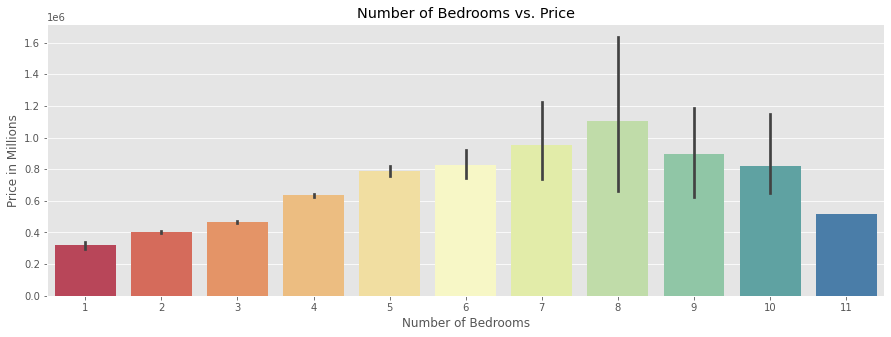

Text(0.5, 0.98, 'Price in Millions vs Bedrooms boxplot')

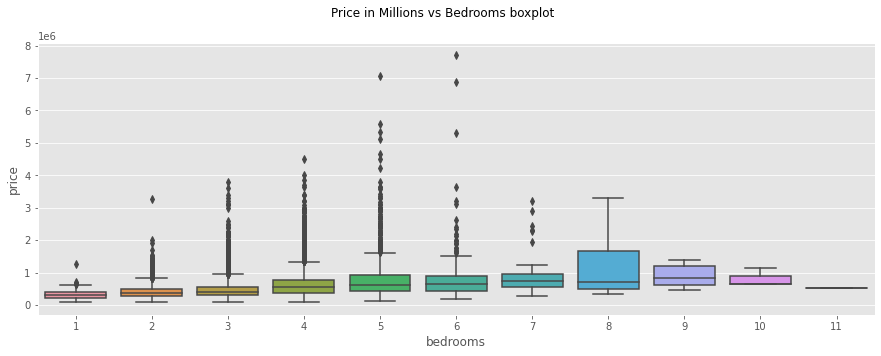

In [557]:
#barplot 'bedrooms' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(df['bedrooms'], df['price'], 
            palette = "Spectral")
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10)
plt.show()

#boxplot
plt.figure(figsize = (15, 5))
sns.boxplot(df.bedrooms, df.price)
plt.suptitle('Price in Millions vs Bedrooms boxplot')

<Figure size 1080x1080 with 0 Axes>

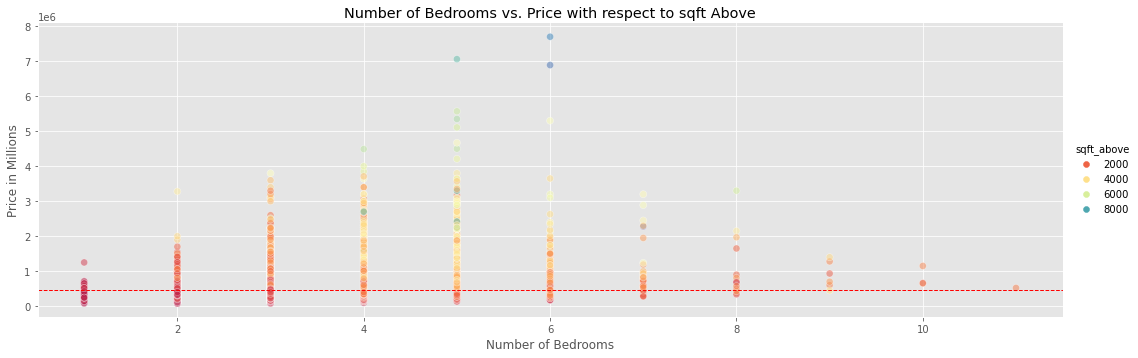

In [558]:
# relational plot 'bedrooms' vs 'price' with respect to 'sqft_above'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'sqft_above',
            data = df,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(df['price'].median(),
           ls = '--', lw = 1, color = 'r')
plt.title('Number of Bedrooms vs. Price with respect to sqft Above')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.show()


In [618]:
#interacting bedrooms with sqft_above
room_ft_above = df['bedrooms'] * df['sqft_above']

#correlation with price
print(room_ft_above.corr(df.price))

0.5918606649686459


##### Points to note:
The correlation is moderately positive, meaning that the price of houses increases with an increase in the number of bedrooms as sqft_above increase upto a certain point. When the sqft_above starts to become small with an increase in bedrooms (reduced space) then the price of the house does not increase with the increase in number of bedrooms

##### Feature **Grade**

In [560]:
# stripping the string
print('The old values for grade are:', list(df.grade.unique()))
df["grade_num"] = df["grade"].str.split().apply(lambda x: x[0])
df['grade_num'] = df['grade_num'].map(int)
print('The numeric values for grade are:', list(df.grade_num.unique()))

The old values for grade are: ['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better', '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor', '13 Mansion']
The numeric values for grade are: [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13]


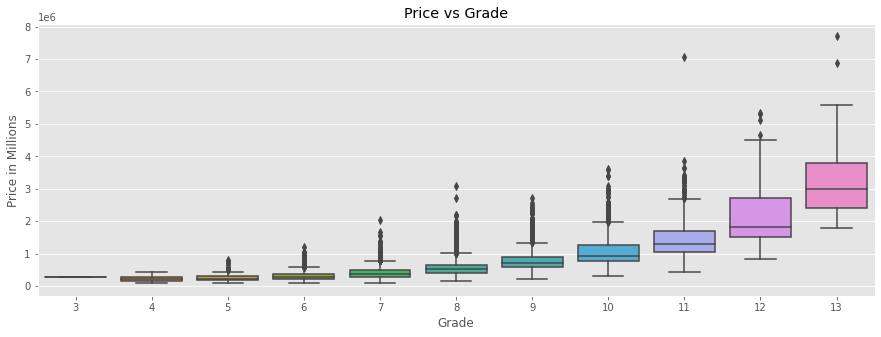

In [561]:
#plotting grade vs price
plt.figure(figsize=(15,5))
sns.boxplot(df.grade_num, df.price)
plt.title('Price vs Grade')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10)
plt.show()

<Figure size 1080x360 with 0 Axes>

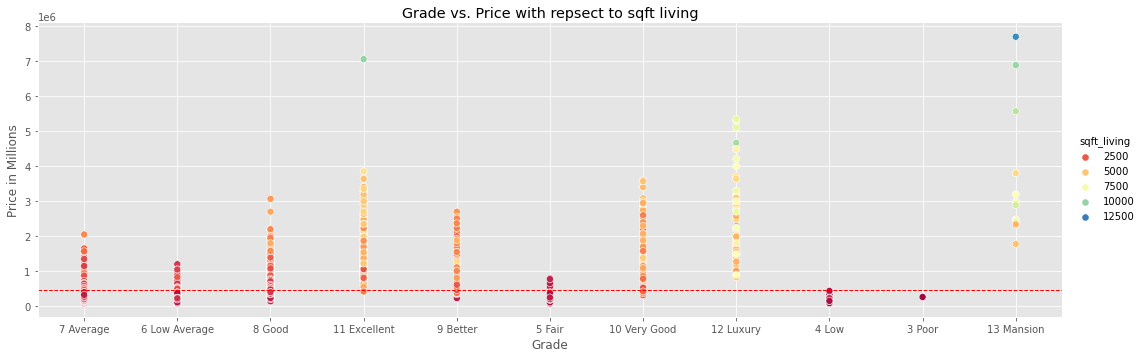

<Figure size 1080x360 with 0 Axes>

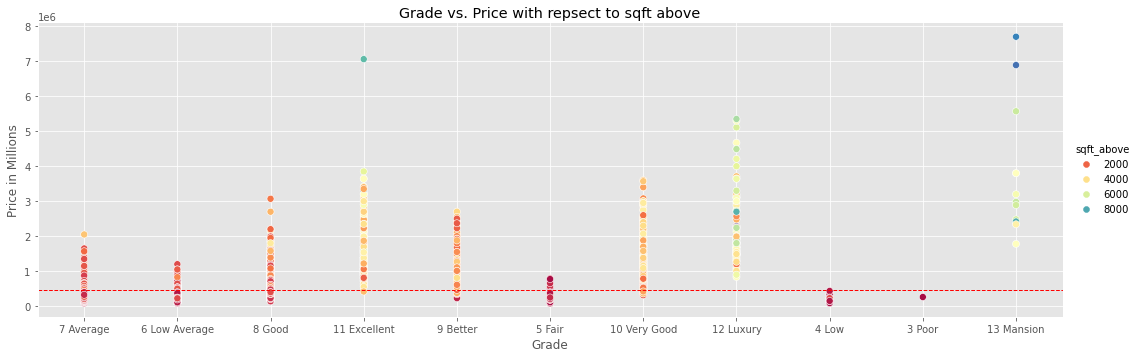

In [562]:
# relational plot 'grade' vs 'price' with respect to 'sqft_living'
plt.figure(figsize = (15, 5))
sns.relplot(x = 'grade',
            y = 'price',
            hue = 'sqft_living',
            data = df,
            s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(df['price'].median(),
           ls = '--', lw = 1, color = 'r')
plt.title('Grade vs. Price with repsect to sqft living')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')
plt.show()

# relational plot grade vs price with respect to sqft_above
plt.figure(figsize = (15, 5))
sns.relplot(x = 'grade',
            y = 'price',
            hue = 'sqft_above',
            data = df,
            s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(df['price'].median(),
           ls = '--', lw = 1, color = 'r')
plt.title('Grade vs. Price with repsect to sqft above')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')
plt.show()

In [563]:
df.grade_num.corr(df.price)

0.6679507713876465

##### Points to note:
* **grade** is strongly and positively correlated with **price**

* An increase in **grade** implies an increase in **price**

* To get beyond the price median, a house needs to be at least grade 10.

* The higher the square footage, the higher the grade.

* Lesser square footage houses need at least grade 7 to go beyond the price median.

##### Feature **house_age**

correlation coefficient of age and price is:  -0.05389023991836023


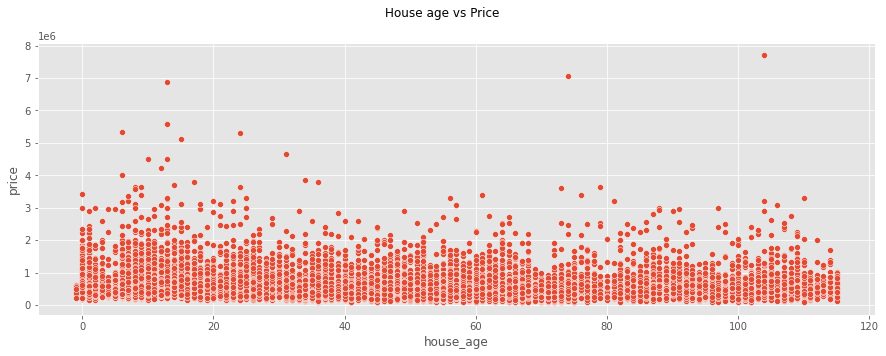

In [564]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.house_age, df.price)
plt.suptitle('House age vs Price')
print('correlation coefficient of age and price is: ', df.house_age.corr(df.price))

##### Points to note:
* An increase in age of the house does not imply an increase in price of the house.

##### Feature **waterfront**

0.2557056953900346
The correlation between waterfront and price is weakly positive, implying houses with a waterfront are slightly expensive than those without


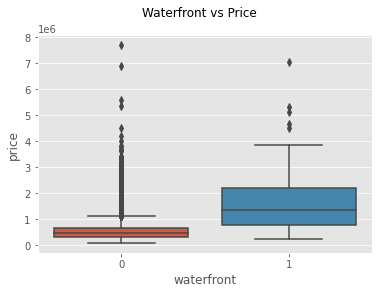

In [565]:
sns.boxplot(df.waterfront, df.price)
plt.suptitle('Waterfront vs Price')
print(df.waterfront.corr(df.price))
print('The correlation between waterfront and price is weakly positive, \
implying houses with a waterfront are slightly expensive than those without')

<Figure size 1080x360 with 0 Axes>

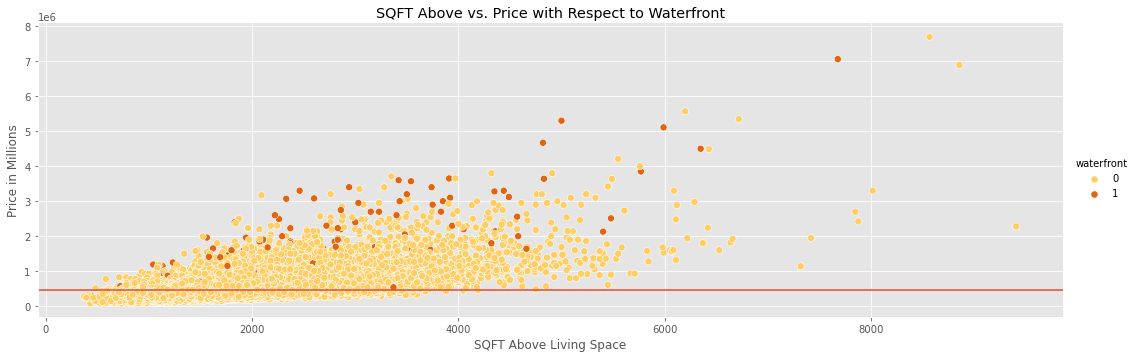

In [591]:
# relational plot 'sqft_above' vs 'price' with respect to 'waterfront'
plt.figure(figsize = (15, 5))
sns.relplot(x = 'sqft_above',
            y = 'price',
            hue = 'waterfront',
            data = df,
            s = 50, aspect = 3, palette = 'YlOrBr')
plt.axhline(df['price'].median())
plt.title('SQFT Above vs. Price with Respect to Waterfront')
plt.xlabel('SQFT Above Living Space')
plt.ylabel('Price in Millions')
plt.show()

##### Points to note :
* With a waterfront, a house is guaranteed to be priced above the median but still there are houses without waterfront that are above median.

##### Feature **renovated**

0.05433047628173493


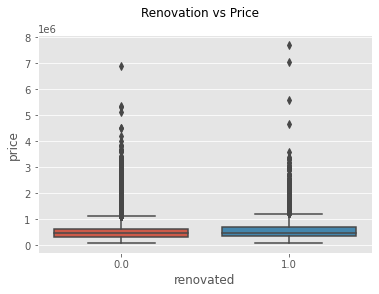

In [566]:
sns.boxplot(df.renovated, df.price)
plt.suptitle('Renovation vs Price')
print(df.renovated.corr(df.price))

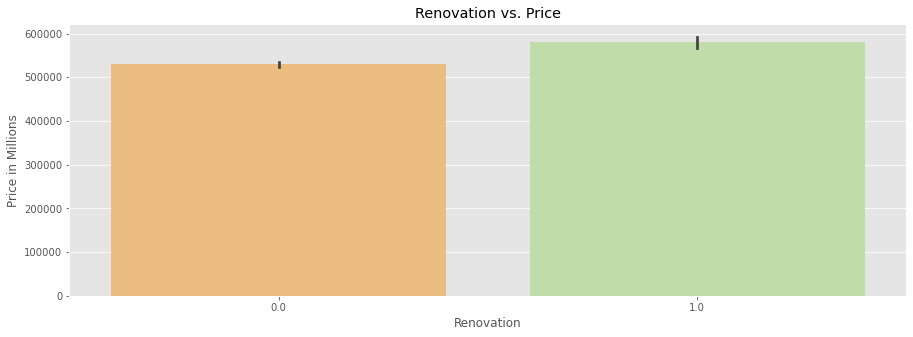

In [593]:
#plotting a barplot 'renovation' vs. 'price'
plt.figure(figsize = (15, 5))
sns.barplot(df['renovated'], df['price'], 
            palette = "Spectral")
plt.title('Renovation vs. Price')
plt.xlabel('Renovation')
plt.ylabel('Price in Millions')
plt.show()

##### Points to note:
* Houses that were renovated have a slightly higher price than those that are not renovated.

##### Feature **zipcode**

##### Which zip codes have the highest price?

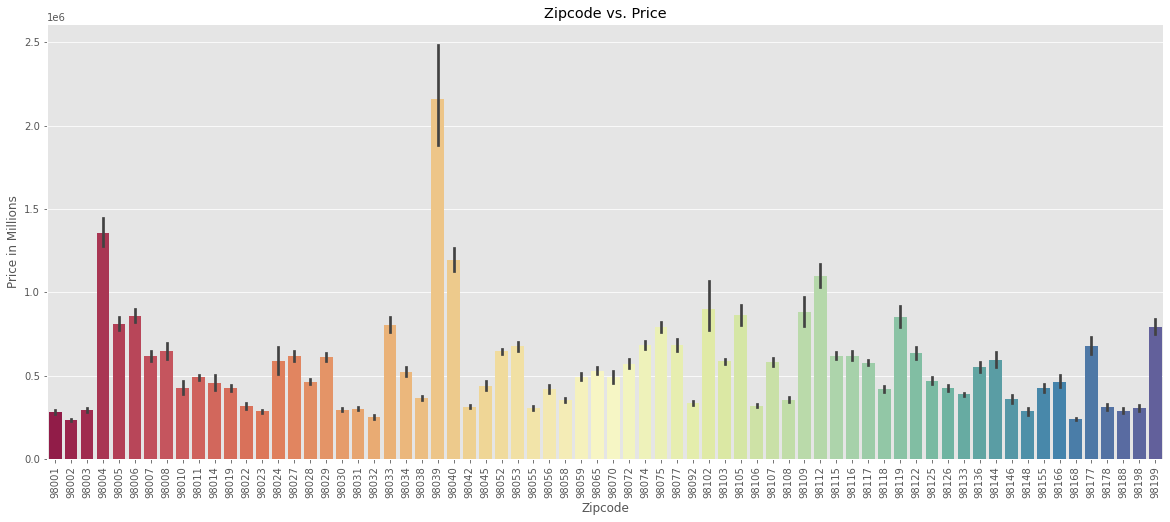

In [567]:
#plot 'zipcode' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.barplot(df['zipcode'], df['price'],
            palette = "Spectral")
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

We notice that zipcode 98004, 98039, 98040, 98112 top the charts in terms of prices.

##### Feature Engineering **zipcode**

We can divide the areas such that: Zipcode data is categoried (A-I) based on the zipcode map on the King County website: https://www.kingcounty.gov/services/gis/Maps/vmc/Boundaries.aspx

* A - Seattle, Shoreline, Lake Forest Park

* B - Kirkland, Kenmore, Bothell, Redmond, Woodinville

* C - Bellevue, Mercer Island, Newcastle

* D - Renton, Kent

* E - Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island

* F - Federal Way, Auburn, Algona, Milton, Pacific

* G - Sammamish, Issaquah, Carnation, Duvall

* H - Covington, Maple Valley, Black Diamond, Enumclaw

* I - Snoquaimie, North Bend

In [568]:
# source of code adoption https://github.com/calbal91/project-king-county-housing/blob/master/Analysis.ipynb

# Seattle, Shoreline, Lake Forest Park
Azips = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
Bzips = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
Czips = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
Dzips = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
Ezips = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
Fzips = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
Gzips = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
Hzips = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
Izips = [98065, 98045, 98024]

In [569]:
def zipper(item):
    '''Parameters:
           x (int): The property's zip code.
       Returns:
           zipcode group (str): The property's area group (a letter from A to I)
           Will return X if zip code not recognised.'''
    
    if item in Azips:
        return 'A'
    elif item in Bzips:
        return 'B'
    elif item in Czips:
        return 'C'
    elif item in Dzips:
        return 'D'
    elif item in Ezips:
        return 'E'
    elif item in Fzips:
        return 'F'
    elif item in Gzips:
        return 'G'
    elif item in Hzips:
        return 'H'
    elif item in Izips:
        return 'I'
    else:
        return 'X'
    
#one hot encoding zipcode
df['zip'] = df['zipcode'].map(zipper)
zip_dummies = pd.get_dummies(df["zip"], prefix="zip")

#merge with dataframe
df = pd.concat([df, zip_dummies], axis=1)

#preview
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zip,zip_A,zip_B,zip_C,zip_D,zip_E,zip_F,zip_G,zip_H,zip_I
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,D,0,0,0,1,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,A,1,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,B,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,A,1,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,G,0,0,0,0,0,0,1,0,0


<Figure size 1080x360 with 0 Axes>

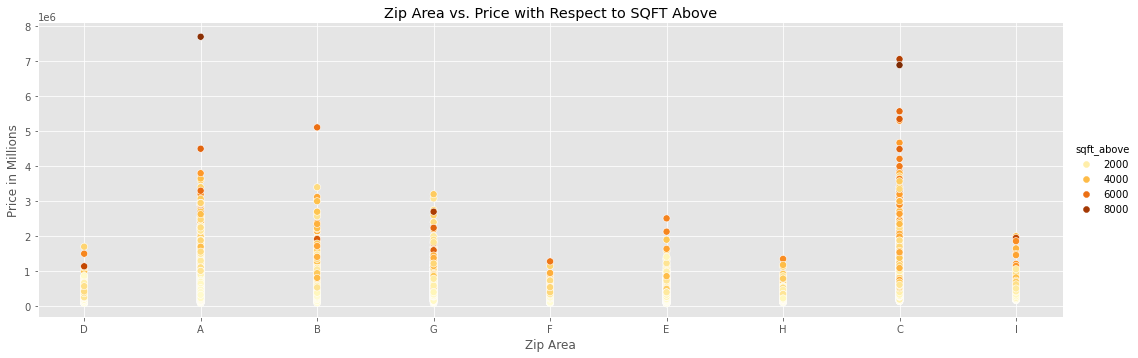

In [570]:
# relplot 'zipcat' vs 'price' with respect to 'sqft_above'
plt.figure(figsize = (15, 5))
sns.relplot(x = 'zip',
            y = 'price',
            hue = 'sqft_above',
            data = df,
            s = 50, aspect = 3, palette = 'YlOrBr')
plt.title('Zip Area vs. Price with Respect to SQFT Above')
plt.xlabel('Zip Area')
plt.ylabel('Price in Millions')
plt.show()

<Figure size 1080x360 with 0 Axes>

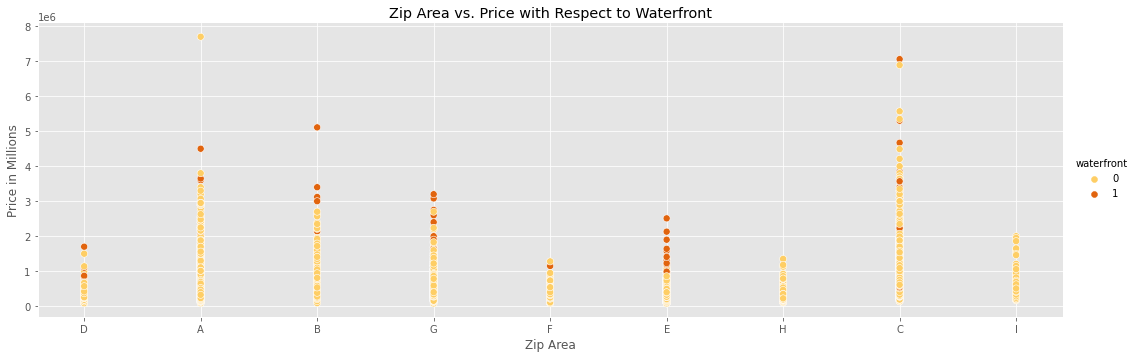

In [571]:
#relplot 'zipcat' vs 'price' with respect to 'waterfront'
plt.figure(figsize = (15, 5))
sns.relplot(x = 'zip',
            y = 'price',
            hue = 'waterfront',
            data = df,
            s = 50, aspect = 3, palette = 'YlOrBr')
plt.title('Zip Area vs. Price with Respect to Waterfront')
plt.xlabel('Zip Area')
plt.ylabel('Price in Millions')
plt.show()

##### Points to note:
* Generally, houses with **waterfront** have higher prices and in C and G they are quite high with C having houses with high **sqft_above**.

##### Log transformation of Numeric Continuous variables

In [572]:
#transforming the target feature
df['price_log'] = np.log(df['price'])

#transforming the predictor numeric continuous variables
df['sqft_above_log'] = np.log(df['sqft_above'])
df['sqft_living_log'] = np.log(df['sqft_living'])
df['sqft_living15_log'] = np.log(df['sqft_living15'])
df['sqft_lot_log'] = np.log(df['sqft_lot'])
df['sqft_lot15_log'] = np.log(df['sqft_lot15'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  float64       
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  float64       
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  float64       
 8   waterfront         21597 non-null  int64         
 9   view               21597 non-null  int64         
 10  condition          21597 non-null  int64         
 11  grade              21597 non-null  object        
 12  sqft_above         21597 non-null  int64         
 13  sqft_basement      21597 non-null  object        
 14  yr_bui

##### Multicollinearity

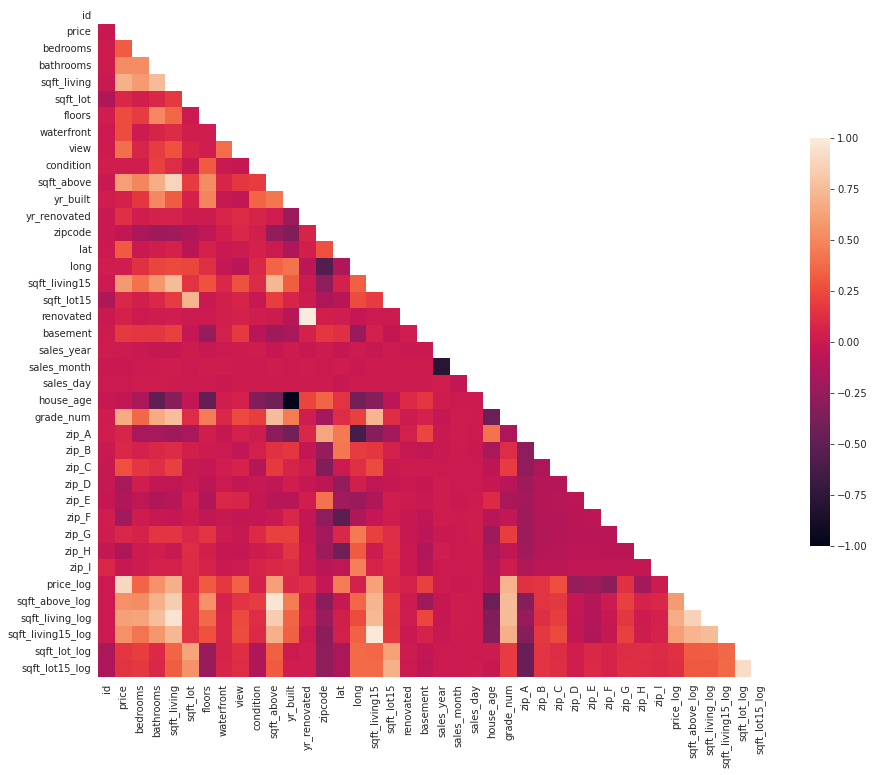

In [573]:
# plotting heatmap for correlation matrix
matrix = np.zeros_like(df.corr())
matrix[np.triu_indices_from(matrix)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(df.corr(), 
                     annot = False,
                     annot_kws={"size": 8},
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = matrix, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

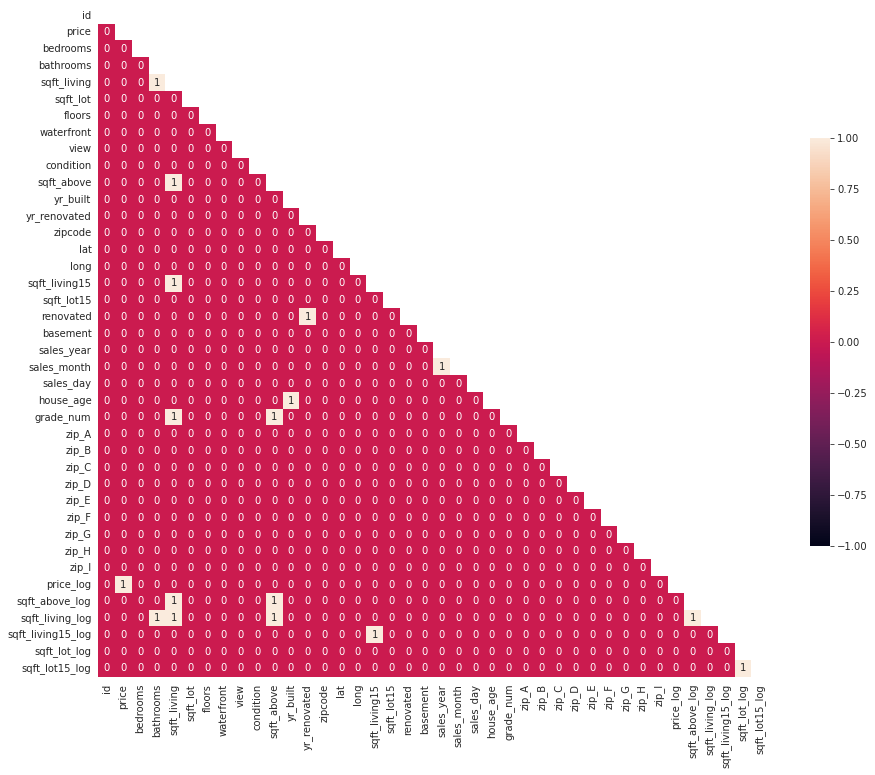

In [574]:
#checking  high correlatiom, above 0.75
#check for multicollinearity
matrix = np.zeros_like(abs(df.corr()) > 0.75)
matrix[np.triu_indices_from(matrix)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(abs(df.corr()) > 0.75, 
                     annot = True, 
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = matrix, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

In [575]:
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'basement',
       'sales_year', 'sales_month', 'sales_day', 'house_age', 'sales_season',
       'grade_num', 'zip', 'zip_A', 'zip_B', 'zip_C', 'zip_D', 'zip_E',
       'zip_F', 'zip_G', 'zip_H', 'zip_I', 'price_log', 'sqft_above_log',
       'sqft_living_log', 'sqft_living15_log', 'sqft_lot_log',
       'sqft_lot15_log'],
      dtype='object')

In [576]:
df_corr['pairs'] = list(zip(df_corr['level_0'], df_corr['level_1']))
df_corr.set_index(['pairs'], inplace = True)

#dropping the level_i columns
df_corr.drop(columns = ['level_0', 'level_1'], inplace = True)

#add correlation column
df_corr.columns = ['cc']

#dropping duplicates
df_corr.drop_duplicates(inplace = True)

#correlations over .75, but less than 1. = multicollinarity
df_corr[(df_corr['cc'] > 0.75) & (df_corr['cc'] < 1)]
df_corr.head(20)

,cc
pairs,
"(id, id)",1.000000
"(yr_renovated, renovated)",0.999968
"(house_age, yr_built)",0.999873
"(sqft_living15_log, sqft_living15)",0.976819
"(sqft_above, sqft_above_log)",0.962547
"(sqft_living_log, sqft_living)",0.954607
"(sqft_lot15_log, sqft_lot_log)",0.918665
"(price, price_log)",0.891745
"(sqft_living, sqft_above)",0.876448


In [577]:
# correlation of features with price
#compare features' correlation with 'price'
main_features = df[['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot', 'bathrooms', 'grade', 'price']]
main_features.corr()

,sqft_living,sqft_above,sqft_living15,sqft_lot,bathrooms,price
sqft_living,1.000000,0.876448,0.756402,0.173453,0.755758,0.701917
sqft_above,0.876448,1.000000,0.731767,0.184139,0.686668,0.605368
sqft_living15,0.756402,0.731767,1.000000,0.144763,0.569884,0.585241
sqft_lot,0.173453,0.184139,0.144763,1.000000,0.088373,0.089876
bathrooms,0.755758,0.686668,0.569884,0.088373,1.000000,0.525906
price,0.701917,0.605368,0.585241,0.089876,0.525906,1.000000


In [578]:
main = main_features.corr().abs().stack().reset_index().sort_values(0, ascending = False)
main['pairs'] = list(zip(main['level_0'], main['level_1']))
main.set_index(['pairs'], inplace = True)

#dropping the level_i columns
main.drop(columns = ['level_0', 'level_1'], inplace = True)

#add correlation column
main.columns = ['cc']

#dropping duplicates
main.drop_duplicates(inplace = True)

#correlations over .75, but less than 1. = multicollinarity
main[(main['cc'] > 0.75) & (main['cc'] < 1)]
main.head(20)

,cc
pairs,
"(sqft_living, sqft_living)",1.000000
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(sqft_living, bathrooms)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_living, price)",0.701917
"(bathrooms, sqft_above)",0.686668
"(sqft_above, price)",0.605368
"(sqft_living15, price)",0.585241


Dropping columns that are highly correlated with each other and those that are weakly correlated with price:
sqft_living, sqft_living_log, sqft_lot15_log, grade_num to avoid multicollinearity.

In [579]:
df_corr[(df_corr['cc'] < 0.5)].head()

,cc
pairs,
"(bedrooms, sqft_above)",0.492549
"(house_age, floors)",0.489514
"(yr_built, floors)",0.489193
"(long, zip_I)",0.463743
"(floors, grade_num)",0.458794


In [580]:
# creating a new data frame for modelling
kc_cleaned = df.copy()
print(kc_cleaned.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'basement',
       'sales_year', 'sales_month', 'sales_day', 'house_age', 'sales_season',
       'grade_num', 'zip', 'zip_A', 'zip_B', 'zip_C', 'zip_D', 'zip_E',
       'zip_F', 'zip_G', 'zip_H', 'zip_I', 'price_log', 'sqft_above_log',
       'sqft_living_log', 'sqft_living15_log', 'sqft_lot_log',
       'sqft_lot15_log'],
      dtype='object')


In [581]:
#dropping both unnecessary features and associated log transformations to avoid multi-collinearity
kc_cleaned.drop(['id', 'date', 'yr_renovated', 'sqft_basement', 'sqft_living',
                 'grade', 'sales_day', 'sales_season', 'sales_year', 'sqft_living_log',
                'yr_built', 'lat', 'long', 'zipcode', 'sqft_lot15_log', 'grade_num'], axis =1, inplace = True)
print(kc_cleaned.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot15',
       'renovated', 'basement', 'sales_month', 'house_age', 'zip', 'zip_A',
       'zip_B', 'zip_C', 'zip_D', 'zip_E', 'zip_F', 'zip_G', 'zip_H', 'zip_I',
       'price_log', 'sqft_above_log', 'sqft_living15_log', 'sqft_lot_log'],
      dtype='object')


##### Placing into various categories

In [582]:
#continuous variables
kc_cont = kc_cleaned[['price', 'price_log', 
                          'sqft_above', 'sqft_above_log', 
                          'sqft_lot', 'sqft_lot_log',
                          'sqft_living15', 'sqft_living15_log', 
                          'sqft_lot15',  
                          'house_age']]

#ordinal variables
kc_ord = kc_cleaned[['bedrooms', 'bathrooms', 'floors']]

#categorical variables
kc_cat = kc_cleaned[['waterfront', 'basement', 'renovated']]

In [583]:
kc_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot15',
       'renovated', 'basement', 'sales_month', 'house_age', 'zip', 'zip_A',
       'zip_B', 'zip_C', 'zip_D', 'zip_E', 'zip_F', 'zip_G', 'zip_H', 'zip_I',
       'price_log', 'sqft_above_log', 'sqft_living15_log', 'sqft_lot_log'],
      dtype='object')

### One hot encoding to ready categorical data

In [504]:
#cast to a numeric type then to string type
kc_cleaned['waterfront'] = kc_cleaned['waterfront'].astype('str')
kc_cleaned['basement'] = kc_cleaned['basement'].astype('float').astype('str')
kc_cleaned['renovated'] = kc_cleaned['renovated'].astype('float').astype('str')
kc_cleaned['condition'] = kc_cleaned['condition'].astype('float').astype('str')

#recheck datatype
print(kc_cleaned['waterfront'].dtypes)
print(kc_cleaned['basement'].dtypes)
print(kc_cleaned['renovated'].dtypes)
print(kc_cleaned['condition'].dtypes)

object
object
object
object


In [584]:
#one hot encode categoricals
water_dummies = pd.get_dummies(kc_cleaned['waterfront'], prefix = 'water', drop_first = True)
basement_dummies = pd.get_dummies(kc_cleaned['basement'], prefix = 'base', drop_first = True)
renovation_dummies = pd.get_dummies(kc_cleaned['renovated'], prefix = 'reno', drop_first = True)
condition_dummies = pd.get_dummies(kc_cleaned['condition'], prefix = 'cond', drop_first = True)
zip_dummies = pd.get_dummies(kc_cleaned['zip'], prefix = 'zip', drop_first = True)

#### Ultimate data frame

In [585]:
kc_cleaned = pd.concat([kc_cont, kc_ord, zip_dummies,
                   water_dummies, basement_dummies, 
                   renovation_dummies, condition_dummies,],
                       axis = 1)
kc_cleaned

,price,price_log,sqft_above,sqft_above_log,sqft_lot,sqft_lot_log,sqft_living15,sqft_living15_log,sqft_lot15,house_age,...,zip_G,zip_H,zip_I,water_1,base_1.0,reno_1.0,cond_1,cond_2,cond_3,cond_4
0,221900.0,12.309982,1180,7.073270,5650,8.639411,1340,7.200425,5650,59,...,0,0,0,0,0,0,0,0,0,1
1,538000.0,13.195614,2170,7.682482,7242,8.887653,1690,7.432484,7639,63,...,0,0,0,0,1,1,0,0,0,1
2,180000.0,12.100712,770,6.646391,10000,9.210340,2720,7.908387,8062,82,...,0,0,0,0,0,1,0,0,0,1
3,604000.0,13.311329,1050,6.956545,5000,8.517193,1360,7.215240,5000,49,...,0,0,0,0,1,0,0,0,1,0
4,510000.0,13.142166,1680,7.426549,8080,8.997147,1800,7.495542,7503,28,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,12.793859,1530,7.333023,1131,7.030857,1530,7.333023,1509,5,...,0,0,0,0,0,0,0,0,0,1
21593,400000.0,12.899220,2310,7.745003,5813,8.667852,1830,7.512071,7200,1,...,0,0,0,0,0,0,0,0,0,1
21594,402101.0,12.904459,1020,6.927558,1350,7.207860,1020,6.927558,2007,5,...,0,0,0,0,0,0,0,0,0,1
21595,400000.0,12.899220,1600,7.377759,2388,7.778211,1410,7.251345,1287,11,...,1,0,0,0,0,0,0,0,0,1


#### Checking Multicollinearity once more

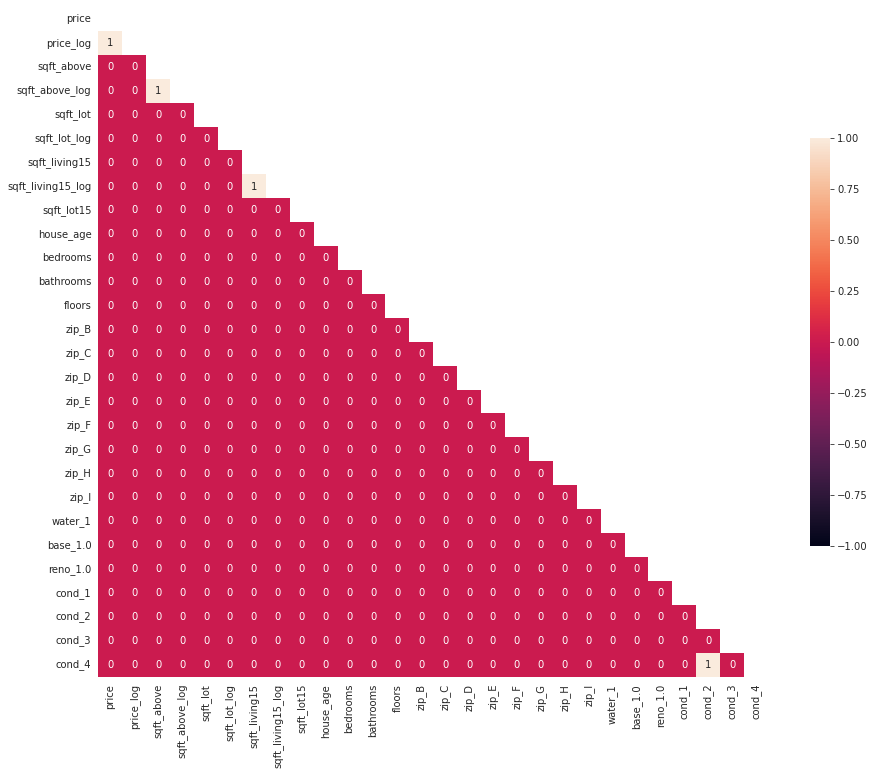

In [586]:
#plotting the correlation matrix
matrix_kc = np.zeros_like(abs(kc_cleaned.corr()) > 0.75)
matrix_kc[np.triu_indices_from(matrix_kc)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(abs(kc_cleaned.corr()) > 0.75, 
                     annot = True, 
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = matrix_kc, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

In [587]:
#saving to csv for later use
kc_cleaned.to_csv('./Data/kc_cleaned.csv')

#### Summary
1. What features have the biggest impact on the price of a house?
2. How can we improve the value of a house?

* Increase the square footage of the living space in the house
* Increase the square footage of the house apart from the basement
* Increase the number of bedrooms but also ensuring that the square footage above is also increased
* An increase in *grade* implies an increase in *price*
* To get beyond the price median, a house needs to be at least grade 10.
* The higher the square footage, the higher the grade.
* Lesser square footage houses need at least grade 7 to go beyond the price median.
* With a waterfront, a house is guaranteed to be priced above the median but still there are houses without waterfront that are above median.
* Houses that were renovated have a slightly higher price than those that are not renovated.

### Recommendations
#### For a land owner:
* A land owner would want to own land near a waterfront because they attract houses with higher prices.
* Having a parcel of land close to a waterfront would imply that it the land owner would have a strong bargaining chip given that a real estate agency would sell a house built on that parcel of land for a high price.
* The best waterfront properties with a high value in price are found in *Zip_C* around Bellevue, Mercer Island and Newcastle
#### For a home owner:
* A home owner that seeks to get a high sell-on value would renovate the house in order to increase the condition and grade of the house. This drives up the price of the house since houses with renovation and houses with good conditions have a high value in terms of price.
* A home owner that is seeking to buy a good home would go for a home with high square footage above ground and a house with around 6-8 bedrooms since beyond 8 bedrooms the price of a house tend to decrease. This might be as a result of an increase in the number of bedrooms that is not followed by an increase in the square footage above ground.
* If the home owner wants to live in the 'expensive' residences and live a luxurious lifestyle then the homeowner would consider areas around *zip C* that have a waterfront.
### For real estate agencies:
* A real estate firm looking to get value for their money should focus in areas around *zip_C* with a waterfront property.
* A real estate firm could also look to focus on properties with high square footage in the living area.
* A real estate firm could also renovate old properties to a very high grade and condition and then sell them for a good price.


### End of Data Understanding